The following is to show a way to quickly organise the data and plot a series of time series matplotlib sublots.

We start by importing the necessary libraries:

In [1]:
from openpyxl import load_workbook
import matplotlib.pyplot as plt

and define the following method which will slide and organize our excel datasets into a single dictionary

In [2]:
def parser_to_dictionary(sheet):
    columns = []
    for row in sheet.rows:
        if columns:
                [columns[i].append(ref.value) for i, ref in enumerate(row)]
        else:
            columns = [[ref.value] for ref in row]
    result = {x[0] : x[1:] for x in columns}
    return result

The sheets are then loaded (due to the size of the dataset's columns (1892), they are in 2 different files):

In [4]:
sheet_ranges1 = load_workbook(filename = 'dataset_example_1.xlsx')['Sheet1']
sheet_ranges2 = load_workbook(filename = 'dataset_example_2.xlsx')['Sheet1']

 Now we call our parser_to_dictionary method, merging the 2 resulting dictionaries in one

In [7]:
data = {**parser_to_dictionary(sheet_ranges1), **parser_to_dictionary(sheet_ranges2)}

We are interested in plotting only some variables, for example: 

In [8]:
varOfInterest = ["young_aged_men_percent_c_", "mid_aged_men_percent_c_", "next_to_pen_men_percent_c_", \
                 "young_aged_women_percent_c_", "mid_aged_women_percent_c_", "next_to_pen_women_percent_c_", "gdp_per_capita_ppp_usd_c_"]

(the dataset includes macroeconomic and solcial variables for 49 different countries, hence in order to quickly manage the range of variables, each variables ends with _c_<country_number> where country_number goes from 1 to 49).

I am interested in 4 countries
A dictionary is defined in order to quickly label the variables in the plot we will create.
In this case the <country_number> are the 4 keys of the dictionary,

In [9]:
countrySelectionDict = {21:"Ireland", 27:"Luxembourg", 33:"Norway", 43:"Switzerland"}

x axis variable:

In [11]:
x = data['time']

We are now ready to plot foe each of the countries indicated above, a very basic stacked sublot with  

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  if sys.path[0] == '':


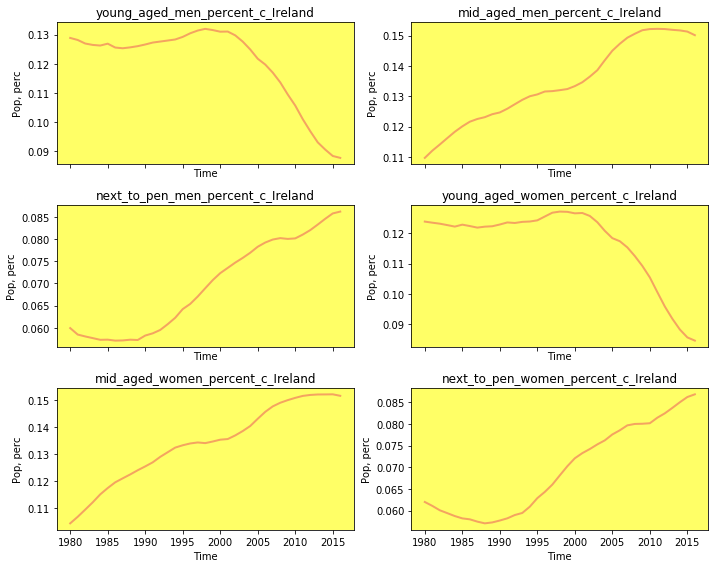

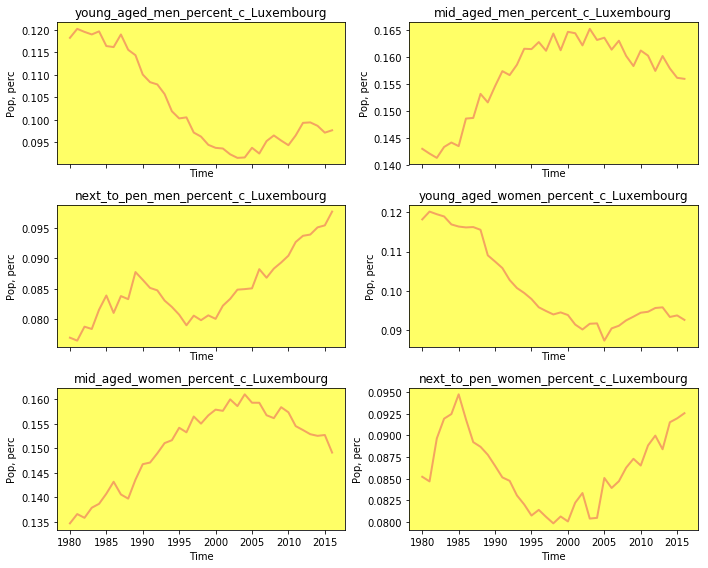

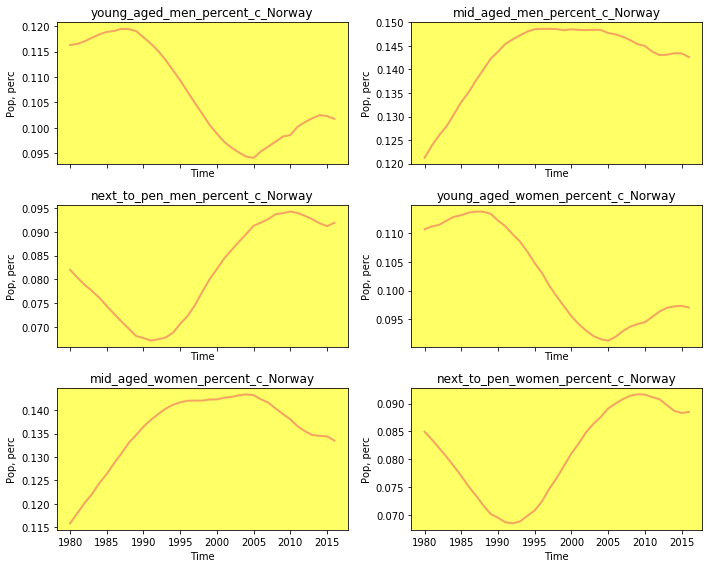

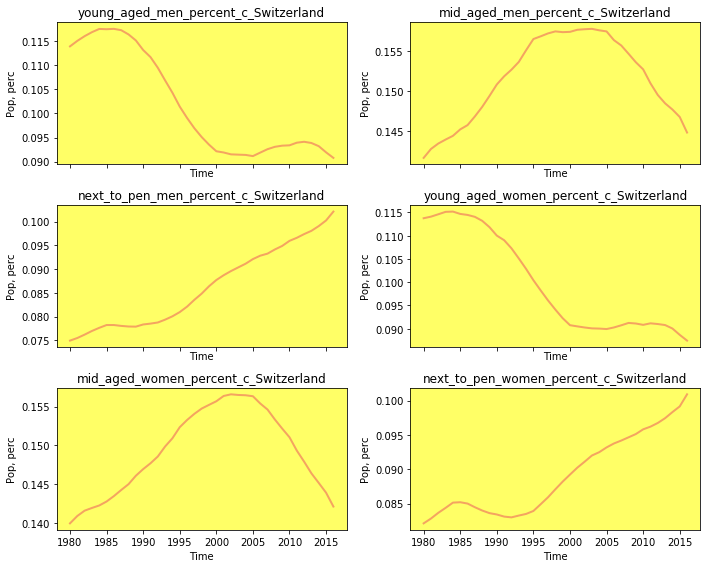

In [12]:
for key, value in countrySelectionDict.items():
    
    f, axs = plt.subplots(3,2, sharex='col', figsize=(10,8))
    axs = axs.ravel()
    
    for i in range(6):
        axs[i].plot(x, data[varOfInterest[i]+str(key)], linewidth=2, c='#F4A460')
        axs[i].set_xlabel("Time")
        axs[i].set_ylabel("Pop, perc") 
        axs[i].set_title(varOfInterest[i]+countrySelectionDict[key])
        axs[i].set_axis_bgcolor("#FFFF66")
    plt.tight_layout()
    #plt.savefig('example_+countrySelectionDict[key].svg', bbox_inches='tight')  
    plt.show()
